#### Analysis of Alcohol and Smoking consumption in Europe 
#### Idelson Mindo
#### 2022-11-03

In [550]:
from pathlib import Path
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Import data

In [535]:
# directory for raw data storage
dir_raw = Path("raw")
# directory for storing clean pre-processed data
dir_data = Path("data")
# make sure it exists
dir_data.mkdir(parents=True, exist_ok=True)

In [536]:
alcohool_df = pd.read_csv('raw/alcohol.csv')

# Data Preprocessing

In [537]:
regions = ['WHO_EURO', 'EU_MEMBERS','CIS','CARINFONET', 'SEEHN','NORDIC'] 
eu2004 = ['WHO_EURO', 'EU_MEMBERS','CIS','CARINFONET', 'SEEHN','NORDIC','EU_AFTER_MAY2004', 'EU_BEFORE_MAY2004']

In [538]:
alcohool_df_year = alcohool_df.loc[alcohool_df['YEAR'] > 2011] 
alcohool_df_countries = alcohool_df_year.query("COUNTRY_REGION != @eu2004")
alcohool_df_regions =  alcohool_df_year[alcohool_df_year.COUNTRY_REGION.isin(regions)] 
alcohool_df_regions.head(5)

,Measure code,COUNTRY_REGION,YEAR,VALUE
373,H2020_5,CARINFONET,2012,3.25
374,H2020_5,CARINFONET,2013,3.21
375,H2020_5,CARINFONET,2014,3.17
376,H2020_5,CARINFONET,2015,3.06
377,H2020_5,CARINFONET,2016,2.96


In [539]:
Alcohol_regions_year_pivot= pd.pivot_table(alcohool_df_regions, index=['COUNTRY_REGION'], values='VALUE',  columns= 'YEAR',
                    aggfunc=np.sum)
Alcohol_regions_year = Alcohol_regions_year_pivot.reset_index('COUNTRY_REGION')
Alcohol_regions_year 

YEAR,COUNTRY_REGION,2012,2013,2014,2015,2016
0,CARINFONET,3.25,3.21,3.17,3.06,2.96
1,CIS,8.39,7.62,6.90,6.47,6.42
2,EU_MEMBERS,10.27,10.12,10.14,10.07,9.89
3,NORDIC,7.86,7.92,7.80,7.69,7.72
4,SEEHN,8.38,8.31,8.04,8.17,8.20
5,WHO_EURO,8.79,8.44,8.21,8.03,7.91


In [540]:
Alcohol_countries_year = pd.pivot_table(alcohool_df_countries, index=['COUNTRY_REGION'], values='VALUE', columns= 'YEAR',
                    aggfunc=np.sum)
Alcohol_countries_year = Alcohol_countries_year.reset_index(drop=False)
Alcohol_countries_year.head(5)

YEAR,COUNTRY_REGION,2012,2013,2014,2015,2016
0,ALB,5.43,5.06,4.81,4.77,5.07
1,AND,10.06,9.78,9.95,9.97,10.06
2,ARM,3.84,3.72,3.97,3.84,3.77
3,AUT,12.10,11.60,12.20,11.40,NaN
4,AZE,1.98,2.04,1.95,0.84,0.39


# Data Analysis

In [541]:
Alcohol_regions_year['sum'] = Alcohol_regions_year.sum(axis=1)
Alcohol_regions_year['max'] = Alcohol_regions_year.max(axis=1)
Alcohol_regions_year['min'] = Alcohol_regions_year.min(axis=1)
Alcohol_regions_year['mean'] = Alcohol_regions_year.mean(axis=1)
Alcohol_regions_year['median'] = Alcohol_regions_year.median(axis=1)
Alcohol_regions_year
#.to_dict('dict')

C:\Users\Mindo\AppData\Local\Temp\ipykernel_7092\2679332444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Alcohol_regions_year['sum'] = Alcohol_regions_year.sum(axis=1)
C:\Users\Mindo\AppData\Local\Temp\ipykernel_7092\2679332444.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Alcohol_regions_year['max'] = Alcohol_regions_year.max(axis=1)
C:\Users\Mindo\AppData\Local\Temp\ipykernel_7092\2679332444.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Alcohol_regions_year['min'] 

YEAR,COUNTRY_REGION,2012,2013,2014,2015,2016,sum,max,min,mean,median
0,CARINFONET,3.25,3.21,3.17,3.06,2.96,15.65,15.65,2.96,6.23875,3.21
1,CIS,8.39,7.62,6.90,6.47,6.42,35.80,35.80,6.42,14.22750,7.62
2,EU_MEMBERS,10.27,10.12,10.14,10.07,9.89,50.49,50.49,9.89,20.17000,10.14
3,NORDIC,7.86,7.92,7.80,7.69,7.72,38.99,38.99,7.69,15.58250,7.86
4,SEEHN,8.38,8.31,8.04,8.17,8.20,41.10,41.10,8.04,16.41750,8.31
5,WHO_EURO,8.79,8.44,8.21,8.03,7.91,41.38,41.38,7.91,16.50625,8.44


In [542]:
Alcohol_countries_year['sum'] = Alcohol_countries_year.sum(axis=1)
Alcohol_countries_year['max'] = Alcohol_countries_year.max(axis=1)
Alcohol_countries_year['min'] = Alcohol_countries_year.min(axis=1)
Alcohol_countries_year['mean'] = Alcohol_countries_year.mean(axis=1)
Alcohol_countries_year['median'] = Alcohol_countries_year.median(axis=1)
Alcohol_countries_year.head(5)

C:\Users\Mindo\AppData\Local\Temp\ipykernel_7092\1428787888.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Alcohol_countries_year['sum'] = Alcohol_countries_year.sum(axis=1)
C:\Users\Mindo\AppData\Local\Temp\ipykernel_7092\1428787888.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Alcohol_countries_year['max'] = Alcohol_countries_year.max(axis=1)
C:\Users\Mindo\AppData\Local\Temp\ipykernel_7092\1428787888.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Alcohol_countries_ye

YEAR,COUNTRY_REGION,2012,2013,2014,2015,2016,sum,max,min,mean,median
0,ALB,5.43,5.06,4.81,4.77,5.07,25.14,25.14,4.77,10.02375,5.07
1,AND,10.06,9.78,9.95,9.97,10.06,49.82,49.82,9.78,19.90500,10.06
2,ARM,3.84,3.72,3.97,3.84,3.77,19.14,19.14,3.72,7.64250,3.84
3,AUT,12.10,11.60,12.20,11.40,NaN,47.30,47.30,11.40,21.90000,12.15
4,AZE,1.98,2.04,1.95,0.84,0.39,7.20,7.20,0.39,2.74875,1.98


In [543]:
stats_Alcohol_regions_year = Alcohol_regions_year.loc[:, ['COUNTRY_REGION','max','min','mean','median','sum']]
stats_Alcohol_regions_year

YEAR,COUNTRY_REGION,max,min,mean,median,sum
0,CARINFONET,15.65,2.96,6.23875,3.21,15.65
1,CIS,35.80,6.42,14.22750,7.62,35.80
2,EU_MEMBERS,50.49,9.89,20.17000,10.14,50.49
3,NORDIC,38.99,7.69,15.58250,7.86,38.99
4,SEEHN,41.10,8.04,16.41750,8.31,41.10
5,WHO_EURO,41.38,7.91,16.50625,8.44,41.38


array([[<AxesSubplot:title={'center':'max'}, xlabel='COUNTRY_REGION'>,
        <AxesSubplot:title={'center':'min'}, xlabel='COUNTRY_REGION'>,
        <AxesSubplot:title={'center':'mean'}, xlabel='COUNTRY_REGION'>,
        <AxesSubplot:title={'center':'median'}, xlabel='COUNTRY_REGION'>,
        <AxesSubplot:title={'center':'sum'}, xlabel='COUNTRY_REGION'>],
       [<AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>],
       [<AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>,
        <AxesSubplot:xlabel='COUNTRY_REGION'>]], dtype=object)

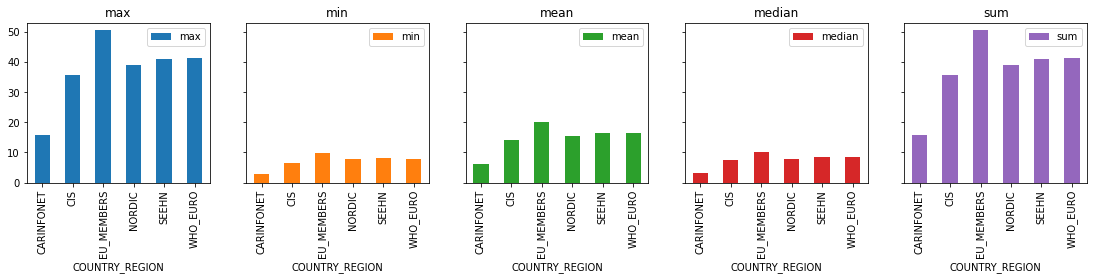

In [567]:
stats_Alcohol_regions_year.plot(x="COUNTRY_REGION", kind='bar',  subplots=True, layout=(3,5), figsize=(19,10), sharey=True)

In [549]:
stat_Alcohol_countries_year = Alcohol_countries_year.loc[:, ['COUNTRY_REGION','max','min','mean','median','sum']]
stat_Alcohol_countries_year.head(8)

YEAR,COUNTRY_REGION,max,min,mean,median,sum
0,ALB,25.14,4.77,10.023750,5.070,25.14
1,AND,49.82,9.78,19.905000,10.060,49.82
2,ARM,19.14,3.72,7.642500,3.840,19.14
3,AUT,47.30,11.40,21.900000,12.150,47.30
4,AZE,7.20,0.39,2.748750,1.980,7.20
5,BEL,41.35,10.09,19.162857,10.465,41.35
6,BGR,55.50,10.67,22.146250,11.300,55.50
7,BIH,22.23,4.33,8.877500,4.440,22.23


<AxesSubplot:title={'center':'Total Alcohol Comsuption per country'}, xlabel='COUNTRY_REGION'>

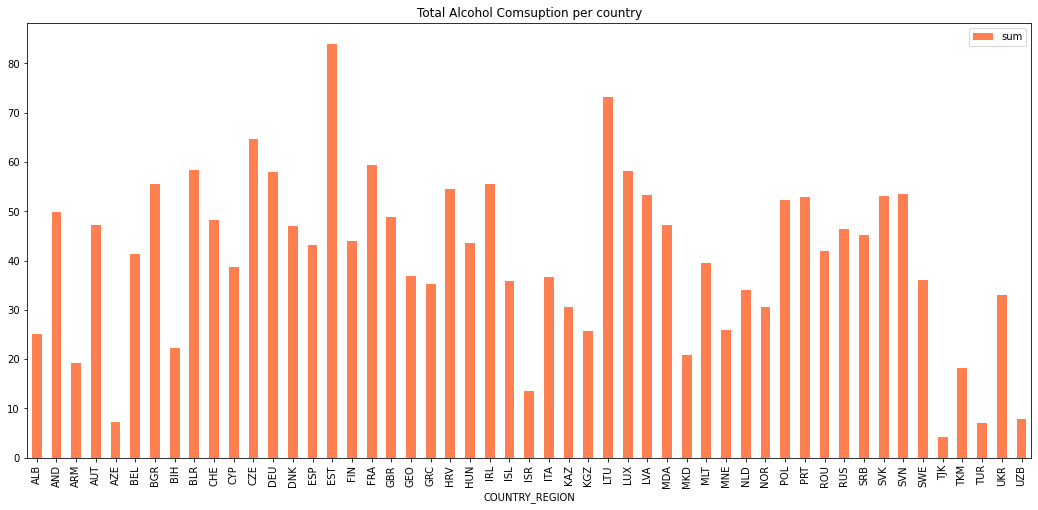

In [569]:
stat_Alcohol_countries_year.plot(x="COUNTRY_REGION", y = "sum", kind='bar', figsize=(18,8),
   color="coral", width=0.8,
   title="Total Alcohol Comsuption per country")

<AxesSubplot:xlabel='YEAR', ylabel='VALUE'>

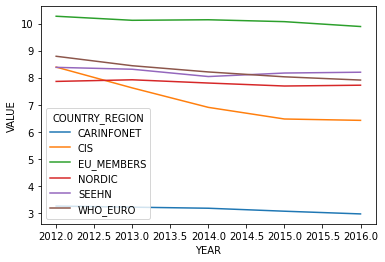

In [547]:
sns.lineplot(data=alcohool_df_regions,x="YEAR", y = "VALUE", hue = 'COUNTRY_REGION')

# Conclusion 

In this assignment, we looked at the basic analysis of smoking in European countries and different regions during 5 years ( 2012 - 2016). 
Particularly challenge was to access real-time or updated data available on the API data. And the data available was available in the .ZIP format so was necessary to transform into csv, in order to perform advanced analyses. The dataset was also limited to country or regions, year, and value of alcohol liters consumed during the years. So based on that was only possible to perform basic analyses such as: Total of liters, median, mean, max, and min. Furthermore, countries that consumed more alcohol and regions that consumed more alcohol during the 5 years.   